# Introduction of Pandas

***

Welcome to the Pandas workshop! Today, we're going to use this JupyterLab interface to demonstrate some basic operation of **Pandas** and how to generate some nice figures from these DataFrames.

__[Pandas](https://pandas.pydata.org/docs/index.html)__ is a powerful data analysis library in Python, the features includes:
- Using a *DataFrame* object for data manipulation.
- Support reading and writing data with various format (csv, excel, SQL and HDF5)
- Highly optimized for performance, with critical code paths written in Cython or C

In order to make sure we're using the same version of Pandas and other libraries. Please log in the hpcc with your terminal and follow the instructions below to install the ipython kernel that I created for this workshop.

1. Log in to you hpcc.

2. run `mkdir -p $HOME/.local/share/jupyter/kernels`

3. run `cp -r /bigdata/stajichlab/shared/condaenv/pandas/share/jupyter/kernels/pandas $HOME/.local/share/jupyter/kernels`


# How to use JupyterLab

***

New to JupyterLab? Don't worry, here I also provide some tips on how to use this interface.

**JupyterLab** is the latest web-based development environment. It provides an **interactive** platform, which is great for learning and debugging! It's quite similar to *R Markdown* (both have these code chunks, but we called it *cell* in **JupyterLab**) so you can run the codes step by step and see all the outputs after running.

Here are some basic operations (somewhat similar to the editor `vim`):
- Press `Enter` to edit the current cell.
- After editing the code. Press `ctrl + Enter` to run the cell and stay on current cell. (Or using `shift + Enter` to run the cell and move to next cell)
- Press `ESC` to leave from editing mode and switch to the command mode.
- In command mode, Press `b` to insert a cell below.
- In command mode, Press `a` to insert a cell above.
- In command mode, Press `dd` to remove the current cell.
- `ctrl + z` to undo and `ctrl + shift + z` to redo.
- Click on the `Interrupt the kernel`<img src="src/stop.png" alt="" title="Stop" /> on the upper panel to force stop when a cell stuck during running.
- Click on the `Restart the kernel`<img src="src/restart.png" alt="" title="Stop" /> on the upper panel if something go wrong seriously or you want to refresh the entire environment.

There is one more feature I'd like to share:
- Press `shift + tab` inside a function. This will show you the description of that function.

It's a very convenient feature when you trying to use a function that you don't know well.

You can use the following cells to practice a bit:


In [1]:
print('practice cell 1')

practice cell 1


In [2]:
print('practice cell 2')

practice cell 2


***

OK, let go to today's topic - **Pandas**!

First of all, please import the `pandas` library. This may take a while...

In [2]:
import pandas as pd

## 1. Introduction of the *Series* and *DataFrame* object

### 1-1. Creating a *Series* by passing a list of values:

Series is the basic unit of Pandas. It is a one-dimensional *ndarray* with axis labels.

In [236]:
s = pd.Series([1, 2, 3, 4])

Note that in JupyterLab, you can view the content of a variable by running it directly. (You still have to use *print* to view the results in a loop)

In [237]:
s

0    1
1    2
2    3
3    4
dtype: int64

### 1-2. Creating a *DataFrame* by passing a nested list with column names:

*DataFrame* is the most frequently used object in Pandas. It is just like the *DataFrame* in R.

In [238]:
df = pd.DataFrame([[1, 2, 3, 4], [5, 6, 7, 8]], columns=['A', 'B', 'C', 'D'])

In [239]:
df

,A,B,C,D
0,1,2,3,4
1,5,6,7,8


### 1-3. Creating a *DataFrame* by passing a dictionary:

In addition to *list*, we can also create a *DataFrame* by converting a *dict*.

In [240]:
d = {'Name': ['Alice', 'Bob', 'Charlie', 'Dave', 'Eve', 'Frank', 'Grace'] ,'Gender': ['F', 'M', 'M', 'M', 'F', 'M', 'F'], 'Age': [20, 40, 32, 31, 25, 20, 40]}

In [241]:
d

{'Name': ['Alice', 'Bob', 'Charlie', 'Dave', 'Eve', 'Frank', 'Grace'],
 'Gender': ['F', 'M', 'M', 'M', 'F', 'M', 'F'],
 'Age': [20, 40, 32, 31, 25, 20, 40]}

In [242]:
df = pd.DataFrame(d)

In [243]:
df

,Name,Gender,Age
0,Alice,F,20
1,Bob,M,40
2,Charlie,M,32
3,Dave,M,31
4,Eve,F,25
5,Frank,M,20
6,Grace,F,40


Another way to convert a *dict* to *DataFrame*

In [244]:
df2 = pd.DataFrame.from_dict(d)

In [245]:
df2

,Name,Gender,Age
0,Alice,F,20
1,Bob,M,40
2,Charlie,M,32
3,Dave,M,31
4,Eve,F,25
5,Frank,M,20
6,Grace,F,40


In this function, you can also set the argument `orient='index'` to change the orientation of the loaded dict.

In [246]:
df3 = pd.DataFrame.from_dict(d, orient='index')

In [247]:
df3

,0,1,2,3,4,5,6
Name,Alice,Bob,Charlie,Dave,Eve,Frank,Grace
Gender,F,M,M,M,F,M,F
Age,20,40,32,31,25,20,40


Transpose the orientation back by `df.T`

In [248]:
df4 = df3.T

In [249]:
df4

,Name,Gender,Age
0,Alice,F,20
1,Bob,M,40
2,Charlie,M,32
3,Dave,M,31
4,Eve,F,25
5,Frank,M,20
6,Grace,F,40


### 1-4. Some basic manipulation of DataFrame object

#### 1-4-1. Select data from *DataFrame* by `df[col_name]`

When `col_name` exist, `df[col_name]` would help you retrieve the content of that column.

In [250]:
df

,Name,Gender,Age
0,Alice,F,20
1,Bob,M,40
2,Charlie,M,32
3,Dave,M,31
4,Eve,F,25
5,Frank,M,20
6,Grace,F,40


In [251]:
df['Age']

0    20
1    40
2    32
3    31
4    25
5    20
6    40
Name: Age, dtype: int64

#### 1-4-2. Add additional column

You also can add a new column by `df[col_name]`. Just give it a new `col_name` with a list-like object.

In [252]:
df['State'] = ['Florida', 'California', 'Kentucky', 'Colorado', 'New York', 'California', 'Texas']

In [253]:
df

,Name,Gender,Age,State
0,Alice,F,20,Florida
1,Bob,M,40,California
2,Charlie,M,32,Kentucky
3,Dave,M,31,Colorado
4,Eve,F,25,New York
5,Frank,M,20,California
6,Grace,F,40,Texas


By using the skills we learned above, try to replace the index column with the column *Name*.

First, We can use the function `df.index` to retrieve the index column.

In [254]:
df.index

RangeIndex(start=0, stop=7, step=1)

In [255]:
df.index = df['Name']

In [256]:
df

,Name,Gender,Age,State
Name,,,,
Alice,Alice,F,20,Florida
Bob,Bob,M,40,California
Charlie,Charlie,M,32,Kentucky
Dave,Dave,M,31,Colorado
Eve,Eve,F,25,New York
Frank,Frank,M,20,California
Grace,Grace,F,40,Texas


We can now delete the *Name* column since it is already being set as index. Remember to assign the modified `df` to a variable. (here we overwrite the original `df`) Otherwise your modified result would not being saved.

In [257]:
df = df.drop('Name', axis=1)

In [258]:
df

,Gender,Age,State
Name,,,
Alice,F,20,Florida
Bob,M,40,California
Charlie,M,32,Kentucky
Dave,M,31,Colorado
Eve,F,25,New York
Frank,M,20,California
Grace,F,40,Texas


#### 1-4-3. Select data from *DataFrame* by `df.loc` and `df.iloc`

`df[col_name]` can retrieve data by column. But what if we want to get the data from row? We can use `df.loc` or `df.iloc` to do that.

Usage:
- `df.loc[row_name]`
- `df.iloc[row_index]`

Try to use `df.loc` and `df.iloc` to extract all the information from **Dave**.

In [259]:
df.loc['Dave']

Gender           M
Age             31
State     Colorado
Name: Dave, dtype: object

In [260]:
df.iloc[3]

Gender           M
Age             31
State     Colorado
Name: Dave, dtype: object

We can also extract multiple rows by passing a list or a slice indeces.

In [261]:
df.loc[['Bob', 'Charlie', 'Dave', 'Eve']]

,Gender,Age,State
Name,,,
Bob,M,40,California
Charlie,M,32,Kentucky
Dave,M,31,Colorado
Eve,F,25,New York


In [262]:
df.iloc[1:5]

,Gender,Age,State
Name,,,
Bob,M,40,California
Charlie,M,32,Kentucky
Dave,M,31,Colorado
Eve,F,25,New York


Note that you can also use `df.loc[:, col_name]` and `df.iloc[:, col_index]` to get the entire column, just like `df[col_name]`.

Below is an example that use `df.loc` to extract the *Gender* column.

In [263]:
df.loc[:, 'Gender']

Name
Alice      F
Bob        M
Charlie    M
Dave       M
Eve        F
Frank      M
Grace      F
Name: Gender, dtype: object

You might notice that the behavior of `df.loc` is somewhat similar to `df[col_name]`. Indeed, the results would be the same, but the processing logic are slightly different. Let's take a look at the example below.

Now we want to get the *State* where Dave lived. Try to use `df.loc`, `df.iloc` and `df[col_name]` to do that.

In [264]:
# df.loc: specify the row_name and col_name directly
df.loc['Dave', 'State']

'Colorado'

In [265]:
# df.iloc: specify the row_index and col_index directly
df.iloc[3, 2]

'Colorado'

In [266]:
# Using df['State'] to get a Series of the 'State' column, and then use 'Dave' as another index to get the data from the Series.
df['State']['Dave']

'Colorado'

Here we breifly summarize the usage of `df.loc` and `df.iloc`:
- `df.loc[row_name(, col_name)]`
- `df.iloc[row_index(, col_index)]`

#### 1-4-4. Subset the **DataFrame**
Let's try to find the people that the age is smaller than 30.

In [267]:
df['Age'] < 30

Name
Alice       True
Bob        False
Charlie    False
Dave       False
Eve         True
Frank       True
Grace      False
Name: Age, dtype: bool

Using the method above we got a boolean Series. So we just simply use it as a boolean mask to apply on the `df`

In [268]:
df[df['Age'] < 30]

,Gender,Age,State
Name,,,
Alice,F,20,Florida
Eve,F,25,New York
Frank,M,20,California


Try to use `df.loc` to extract the *State* these young guys lived.

In [269]:
df.loc[df['Age'] < 30, 'State']

Name
Alice       Florida
Eve        New York
Frank    California
Name: State, dtype: object

#### 1-4-5. Sort DataFrame
`df.sort_values()` can sort by the values of a column. Save it to another object `df_sort_age`, we'll use it later.

In [270]:
df_sort_age = df.sort_values('Age')

In [271]:
df_sort_age

,Gender,Age,State
Name,,,
Alice,F,20,Florida
Frank,M,20,California
Eve,F,25,New York
Dave,M,31,Colorado
Charlie,M,32,Kentucky
Bob,M,40,California
Grace,F,40,Texas


We can also sort by multiple values by input a list instead of a single string.

The example below would sort the `df` by *State* first and then sort by *Age*. (*Age* is primary and *State* is secondary)

In [272]:
df.sort_values(['Age', 'State'])

,Gender,Age,State
Name,,,
Frank,M,20,California
Alice,F,20,Florida
Eve,F,25,New York
Dave,M,31,Colorado
Charlie,M,32,Kentucky
Bob,M,40,California
Grace,F,40,Texas


In [273]:
# Identical counterpart
df.sort_values('State').sort_values('Age')

,Gender,Age,State
Name,,,
Frank,M,20,California
Alice,F,20,Florida
Eve,F,25,New York
Dave,M,31,Colorado
Charlie,M,32,Kentucky
Bob,M,40,California
Grace,F,40,Texas


We can also sort the *DataFrame* by index. Here we'll use the `df_sort_age` as an example. (since its index have been disrupted)

In [274]:
df_sort_age

,Gender,Age,State
Name,,,
Alice,F,20,Florida
Frank,M,20,California
Eve,F,25,New York
Dave,M,31,Colorado
Charlie,M,32,Kentucky
Bob,M,40,California
Grace,F,40,Texas


In [275]:
df_sort_age.sort_index()

,Gender,Age,State
Name,,,
Alice,F,20,Florida
Bob,M,40,California
Charlie,M,32,Kentucky
Dave,M,31,Colorado
Eve,F,25,New York
Frank,M,20,California
Grace,F,40,Texas


#### 1-4-6. Others

Here are some features that I also used often but not that essential. We'll just breifly go through it.

- `df.shape` will return the dimension of the `df`

In [276]:
df.shape

(7, 3)

- `df.to_dict` will return a dictionary converted from the `df`

In [277]:
df.to_dict()

{'Gender': {'Alice': 'F',
  'Bob': 'M',
  'Charlie': 'M',
  'Dave': 'M',
  'Eve': 'F',
  'Frank': 'M',
  'Grace': 'F'},
 'Age': {'Alice': 20,
  'Bob': 40,
  'Charlie': 32,
  'Dave': 31,
  'Eve': 25,
  'Frank': 20,
  'Grace': 40},
 'State': {'Alice': 'Florida',
  'Bob': 'California',
  'Charlie': 'Kentucky',
  'Dave': 'Colorado',
  'Eve': 'New York',
  'Frank': 'California',
  'Grace': 'Texas'}}

- `df.values` will return an numpy array converted from the `df`

In [278]:
df.values

array([['F', 20, 'Florida'],
       ['M', 40, 'California'],
       ['M', 32, 'Kentucky'],
       ['M', 31, 'Colorado'],
       ['F', 25, 'New York'],
       ['M', 20, 'California'],
       ['F', 40, 'Texas']], dtype=object)

- `s.tolist()` will convert a Series to a list

In [279]:
df['State'].tolist()

['Florida',
 'California',
 'Kentucky',
 'Colorado',
 'New York',
 'California',
 'Texas']

- `df.mean()` will return the mean of the `df`, note that you have select only the **numeric** columns if there are **non-numeric** values in your *DataFrame*. (in our `df` only column 'Age' is numeric)

In [280]:
df['Age'].mean()

29.714285714285715

- `df.std()` will return the standard deviation of the `df`, specify the **numeric** columns if there are **non-numeric** values in you *DataFrame*.

In [281]:
df['Age'].std()

8.459989868281674

- `df.median()` will return the median of the `df`, specify the **numeric** columns if there are **non-numeric** values in you *DataFrame*.

In [282]:
df['Age'].median()

31.0

- `df.describe()` will return a table of basic statistic description of the *DataFrame*

In [283]:
df.describe()

,Age
count,7.000000
mean,29.714286
std,8.459990
min,20.000000
25%,22.500000
50%,31.000000
75%,36.000000
max,40.000000


## 2. Read and write with different data formats

### 2-1. Import the csv (Comma-separated values) file
By default the function `pd.read_csv()` load files with csv format. The default value of the argument `sep`, which control the delimiter to use, have been set as '**,**' (comma)

In [284]:
df_samp_1 = pd.read_csv('data/sample_1.csv')

In [285]:
df_samp_1

,Gene,TPM
0,PMP2,13.44980
1,ARK1,9.31458
2,SNC1,11.36890
3,SWI1,9.43545
4,YDR261W-B,12.87530
5,YLR154W-F,11.53480
6,NHP6B,12.23650
7,RAD28,8.87234
8,RTC1,7.84207
9,KRE1,11.92530


### 2-2. Import the tsv (Tab-separated values) file

When directly load a tsv file through `pd.read_csv()` would cause a mis-organized output.

In [286]:
df_samp_2 = pd.read_csv('data/sample_2.tsv')

In [287]:
df_samp_2

,Gene\tTPM
0,YBL005W-A\t12.4551
1,ATP16\t11.5831
2,COX13\t11.3632
3,ERO1\t11.7604
4,KSH1\t11.3477
5,HDA1\t7.82998
6,COX8\t10.488
7,YLR154W-F\t11.2489
8,NHP6B\t12.1082
9,RAD28\t8.6147


Specifying the argument `sep='\t'` will fix the tsv loading problem.

In [288]:
df_samp_2 = pd.read_csv('data/sample_2.tsv', sep='\t')

In [289]:
df_samp_2

,Gene,TPM
0,YBL005W-A,12.45510
1,ATP16,11.58310
2,COX13,11.36320
3,ERO1,11.76040
4,KSH1,11.34770
5,HDA1,7.82998
6,COX8,10.48800
7,YLR154W-F,11.24890
8,NHP6B,12.10820
9,RAD28,8.61470


### 2-3. Import files without header
By default the first line would be set as header. But some tables are lack of header and the first row would be set as header accidentally.

In [290]:
df_samp_3 = pd.read_csv('data/sample_3.csv')

In [291]:
df_samp_3

,PMP2,13.2347
0,ARK1,8.98824
1,SNC1,11.18560
2,SWI1,8.88728
3,YDR261W-B,12.50640
4,COX8,10.14050
5,YLR154W-F,10.63030
6,NHP6B,11.86390
7,RAD28,8.05457
8,RTC1,7.07700
9,PUP2,12.57740


In order to avoid the behavior, we can set the argument `header=None`. The header would become a list of indeces \[0, 1, ...\].

In [292]:
df_samp_3 = pd.read_csv('data/sample_3.csv', header=None)

In [293]:
df_samp_3

,0,1
0,PMP2,13.23470
1,ARK1,8.98824
2,SNC1,11.18560
3,SWI1,8.88728
4,YDR261W-B,12.50640
5,COX8,10.14050
6,YLR154W-F,10.63030
7,NHP6B,11.86390
8,RAD28,8.05457
9,RTC1,7.07700


After the **DataFrame** is created, we can re-assign the column name directly by `df.columns = list_like_object`.

In [294]:
df_samp_3.columns = ['Gene', 'TPM']

In [295]:
df_samp_3

,Gene,TPM
0,PMP2,13.23470
1,ARK1,8.98824
2,SNC1,11.18560
3,SWI1,8.88728
4,YDR261W-B,12.50640
5,COX8,10.14050
6,YLR154W-F,10.63030
7,NHP6B,11.86390
8,RAD28,8.05457
9,RTC1,7.07700


### 2-4. Ignore the comments in files
Loading a file with comment would also cause problem. By default the first line would be set as header.

In [296]:
df_samp_4 = pd.read_csv('data/sample_4.csv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 4, saw 2


Specifying the argument ***comment*** as '#' to indicate the lines started with # should not be parsed

In [297]:
df_samp_4 = pd.read_csv('data/sample_4.csv', comment='#')

In [298]:
df_samp_4

,Gene,TPM
0,PMP2,13.11380
1,ARK1,8.80636
2,YDR261W-B,12.35750
3,ERO1,11.50890
4,EGT2,11.80380
5,EGT2,11.80380
6,YCL002C,8.32765
7,SNC1,11.10890
8,ATP16,11.00450
9,SWI1,8.70331


### 2-5. Write a DataFrame to file

Writing a **DataFrame** out to a file is also simple, you can do this by `df.to_csv()` Here, let's try to save the df_samp_4 we got above to a new file.

In [299]:
df_samp_4.to_csv('new_file.csv')

If you don't want the index column in your csv output...

In [300]:
df_samp_4.to_csv('new_file2.csv', index=False)

If you prefer to save it in tsv format, you can specify `sep='\t'` to get one.

In [301]:
df_samp_4.to_csv('new_file.tsv', sep='\t', index=False)

## 3. Advanced usage of DataFrame object

In this chapter, we'll use a truncated gene-expression profile to demonstrate some advanced usages of Pandas.

### 3-1. Change column names

We have learned using [`df.columns` to re-assign the column names](#2-3.-Import-files-without-header). However, it will change the entire header.

If you only want to change a part of the column names, you can use the function `df.rename()` with argument `axis=1` (the default `axis=0` would change the row names (index column)).

You can assign the result to a new variable (`new_df` in this case) or specify the argument `inplace=True` to directly modify the original object.

In [302]:
df_samp_1

,Gene,TPM
0,PMP2,13.44980
1,ARK1,9.31458
2,SNC1,11.36890
3,SWI1,9.43545
4,YDR261W-B,12.87530
5,YLR154W-F,11.53480
6,NHP6B,12.23650
7,RAD28,8.87234
8,RTC1,7.84207
9,KRE1,11.92530


In [303]:
new_df = df_samp_1.rename({'Gene': 'Name'}, axis=1)

In [304]:
new_df

,Name,TPM
0,PMP2,13.44980
1,ARK1,9.31458
2,SNC1,11.36890
3,SWI1,9.43545
4,YDR261W-B,12.87530
5,YLR154W-F,11.53480
6,NHP6B,12.23650
7,RAD28,8.87234
8,RTC1,7.84207
9,KRE1,11.92530


In [305]:
df_samp_1.rename({'TPM': 'TPM_s1'}, axis=1, inplace=True)

In [306]:
df_samp_1

,Gene,TPM_s1
0,PMP2,13.44980
1,ARK1,9.31458
2,SNC1,11.36890
3,SWI1,9.43545
4,YDR261W-B,12.87530
5,YLR154W-F,11.53480
6,NHP6B,12.23650
7,RAD28,8.87234
8,RTC1,7.84207
9,KRE1,11.92530


### 3-2. Merge the **DataFrames**

We can merge 2 *Dataframe* objects by the functions `pd.merge(df1, df2)` or `df1.merge(df2)`.

There are several important arguments can be used to control the merging behavior:

- ***how***: type of merge to be performed. Default is 'inner', which use intersection of keys from both frames.

- ***on***: column or index level names to join on. These must be found in both DataFrames.

In [307]:
pd.merge(df_samp_2, df_samp_3, on='Gene')

,Gene,TPM_x,TPM_y
0,YBL005W-A,12.45510,12.21290
1,ATP16,11.58310,11.23210
2,COX13,11.36320,10.93550
3,ERO1,11.76040,11.60360
4,KSH1,11.34770,11.19450
5,HDA1,7.82998,7.62966
6,COX8,10.48800,10.14050
7,YLR154W-F,11.24890,10.63030
8,NHP6B,12.10820,11.86390
9,RAD28,8.61470,8.05457


In [308]:
df_samp_2.merge(df_samp_3, how='outer', on='Gene')

,Gene,TPM_x,TPM_y
0,YBL005W-A,12.45510,12.21290
1,ATP16,11.58310,11.23210
2,COX13,11.36320,10.93550
3,ERO1,11.76040,11.60360
4,KSH1,11.34770,11.19450
5,HDA1,7.82998,7.62966
6,COX8,10.48800,10.14050
7,YLR154W-F,11.24890,10.63030
8,NHP6B,12.10820,11.86390
9,RAD28,8.61470,8.05457


You can merge the 2 *DataFrames* even with different column name.

In [309]:
new_df

,Name,TPM
0,PMP2,13.44980
1,ARK1,9.31458
2,SNC1,11.36890
3,SWI1,9.43545
4,YDR261W-B,12.87530
5,YLR154W-F,11.53480
6,NHP6B,12.23650
7,RAD28,8.87234
8,RTC1,7.84207
9,KRE1,11.92530


In [310]:
pd.merge(df_samp_2, new_df, left_on='Gene', right_on='Name', how='outer')

,Gene,TPM_x,Name,TPM_y
0,YBL005W-A,12.45510,NaN,NaN
1,ATP16,11.58310,ATP16,11.52210
2,COX13,11.36320,COX13,11.31180
3,ERO1,11.76040,ERO1,11.77450
4,KSH1,11.34770,KSH1,11.40420
5,HDA1,7.82998,HDA1,7.98176
6,COX8,10.48800,NaN,NaN
7,YLR154W-F,11.24890,YLR154W-F,11.53480
8,NHP6B,12.10820,NHP6B,12.23650
9,RAD28,8.61470,RAD28,8.87234


An example of merge several **DataFrames** by a for loop:

In [311]:
combined_df = df_samp_1

In [312]:
for df in [df_samp_2, df_samp_3, df_samp_4]:
    combined_df = combined_df.merge(df, how='outer', on='Gene')

In [313]:
combined_df

,Gene,TPM_s1,TPM_x,TPM_y,TPM
0,PMP2,13.44980,13.33680,13.23470,13.11380
1,ARK1,9.31458,9.13275,8.98824,8.80636
2,SNC1,11.36890,NaN,11.18560,11.10890
3,SWI1,9.43545,9.20186,8.88728,8.70331
4,YDR261W-B,12.87530,12.71870,12.50640,12.35750
5,YLR154W-F,11.53480,11.24890,10.63030,NaN
6,NHP6B,12.23650,12.10820,11.86390,NaN
7,RAD28,8.87234,8.61470,8.05457,7.66417
8,RTC1,7.84207,NaN,7.07700,6.72052
9,KRE1,11.92530,11.87340,11.72780,11.62600


In [314]:
combined_df.columns = ['Gene', 'sample1', 'sample2', 'sample3', 'sample4']

In [315]:
combined_df

,Gene,sample1,sample2,sample3,sample4
0,PMP2,13.44980,13.33680,13.23470,13.11380
1,ARK1,9.31458,9.13275,8.98824,8.80636
2,SNC1,11.36890,NaN,11.18560,11.10890
3,SWI1,9.43545,9.20186,8.88728,8.70331
4,YDR261W-B,12.87530,12.71870,12.50640,12.35750
5,YLR154W-F,11.53480,11.24890,10.63030,NaN
6,NHP6B,12.23650,12.10820,11.86390,NaN
7,RAD28,8.87234,8.61470,8.05457,7.66417
8,RTC1,7.84207,NaN,7.07700,6.72052
9,KRE1,11.92530,11.87340,11.72780,11.62600


### 3-3. Refine DataFrame

#### 3-3-1. Deal with duplicated data
You might notice that a gene *'EGT2'* have many duplicates. We can use the function `df.drop_duplicates()` to remove them.

Like what we did above, you can assign the result to a new variable or specify `inplace=True` to directly modify the object. Here we use ***inplace*** to change the `combined_df`.

In [316]:
combined_df.drop_duplicates(inplace=True)

In [317]:
combined_df

,Gene,sample1,sample2,sample3,sample4
0,PMP2,13.44980,13.33680,13.23470,13.11380
1,ARK1,9.31458,9.13275,8.98824,8.80636
2,SNC1,11.36890,NaN,11.18560,11.10890
3,SWI1,9.43545,9.20186,8.88728,8.70331
4,YDR261W-B,12.87530,12.71870,12.50640,12.35750
5,YLR154W-F,11.53480,11.24890,10.63030,NaN
6,NHP6B,12.23650,12.10820,11.86390,NaN
7,RAD28,8.87234,8.61470,8.05457,7.66417
8,RTC1,7.84207,NaN,7.07700,6.72052
9,KRE1,11.92530,11.87340,11.72780,11.62600


#### 3-3-2. Deal with missing data *NaN*

It seems like a lot of NaN in `combined_df`. We can use the function `df.dropna()` to remove them.

Note that it will still remove the entire row even contains only one NaN. (which not what we want, so DO NOT re-assign or use ***inplace*** to modify the `combined_df`)

In [318]:
df_dropna = combined_df.dropna()

In [319]:
df_dropna

,Gene,sample1,sample2,sample3,sample4
0,PMP2,13.44980,13.33680,13.23470,13.11380
1,ARK1,9.31458,9.13275,8.98824,8.80636
3,SWI1,9.43545,9.20186,8.88728,8.70331
4,YDR261W-B,12.87530,12.71870,12.50640,12.35750
7,RAD28,8.87234,8.61470,8.05457,7.66417
9,KRE1,11.92530,11.87340,11.72780,11.62600
10,ERD2,9.86781,9.73894,9.46022,9.22987
12,YBR255C-A,9.06145,8.79874,8.23745,7.60011
16,ATP16,11.52210,11.58310,11.23210,11.00450
18,ERO1,11.77450,11.76040,11.60360,11.50890


- Small tip: `df.dropna()` remove rows containing NaN would result in discontinued index. We can fix this by df.reset_index(). (the argument `drop=True` indicates we would like to drop the old index)

In [320]:
df_dropna.reset_index(drop=True)

,Gene,sample1,sample2,sample3,sample4
0,PMP2,13.44980,13.33680,13.23470,13.11380
1,ARK1,9.31458,9.13275,8.98824,8.80636
2,SWI1,9.43545,9.20186,8.88728,8.70331
3,YDR261W-B,12.87530,12.71870,12.50640,12.35750
4,RAD28,8.87234,8.61470,8.05457,7.66417
5,KRE1,11.92530,11.87340,11.72780,11.62600
6,ERD2,9.86781,9.73894,9.46022,9.22987
7,YBR255C-A,9.06145,8.79874,8.23745,7.60011
8,ATP16,11.52210,11.58310,11.23210,11.00450
9,ERO1,11.77450,11.76040,11.60360,11.50890


Instead of remove the rows containing NaN, `df.fillna()` help you to fill the NaN values with specified values or methods.

In the following case, we fill the NaN with 0.

- **Note: this might not be the best way to deal with missing data. Therefore, DO NOT re-assign or use the ***inplace*** to modify the `combined_df`.**

In [321]:
combined_df

,Gene,sample1,sample2,sample3,sample4
0,PMP2,13.44980,13.33680,13.23470,13.11380
1,ARK1,9.31458,9.13275,8.98824,8.80636
2,SNC1,11.36890,NaN,11.18560,11.10890
3,SWI1,9.43545,9.20186,8.88728,8.70331
4,YDR261W-B,12.87530,12.71870,12.50640,12.35750
5,YLR154W-F,11.53480,11.24890,10.63030,NaN
6,NHP6B,12.23650,12.10820,11.86390,NaN
7,RAD28,8.87234,8.61470,8.05457,7.66417
8,RTC1,7.84207,NaN,7.07700,6.72052
9,KRE1,11.92530,11.87340,11.72780,11.62600


In [322]:
combined_df.fillna(0)

,Gene,sample1,sample2,sample3,sample4
0,PMP2,13.44980,13.33680,13.23470,13.11380
1,ARK1,9.31458,9.13275,8.98824,8.80636
2,SNC1,11.36890,0.00000,11.18560,11.10890
3,SWI1,9.43545,9.20186,8.88728,8.70331
4,YDR261W-B,12.87530,12.71870,12.50640,12.35750
5,YLR154W-F,11.53480,11.24890,10.63030,0.00000
6,NHP6B,12.23650,12.10820,11.86390,0.00000
7,RAD28,8.87234,8.61470,8.05457,7.66417
8,RTC1,7.84207,0.00000,7.07700,6.72052
9,KRE1,11.92530,11.87340,11.72780,11.62600


If we assume that the expression level would be quite similar between samples and suspect those missing value is due to some technical error or human interference, (Yes, I deleted some values from it :D) fill the NaN with row averages might be a better way. 

Theoretically it should be done by:
`combined_df.fillna(combined_df.iloc[:, 1:].mean(axis=1), axis=1)`

However, fillna row by row is not implemented yet... You'll get a error message

In [323]:
combined_df.fillna(combined_df.iloc[:, 1:].mean(axis=1), axis=1)

NotImplementedError: Currently only can fill with dict/Series column by column

Don't worry, we can transpose the `combined_df` first and fill it column by column. And then transpose back to the original orientation.

First, let's transpose the `combined_df` and save it to `df_T`

In [324]:
df_T = combined_df.T

In [325]:
df_T

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,35,36,37,38
Gene,PMP2,ARK1,SNC1,SWI1,YDR261W-B,YLR154W-F,NHP6B,RAD28,RTC1,KRE1,...,HDA1,ARC18,ATP16,COX13,ERO1,EGT2,YBL005W-A,COX8,PUP2,YCL002C
sample1,13.4498,9.31458,11.3689,9.43545,12.8753,11.5348,12.2365,8.87234,7.84207,11.9253,...,7.98176,11.3244,11.5221,11.3118,11.7745,12.3875,NaN,NaN,NaN,NaN
sample2,13.3368,9.13275,NaN,9.20186,12.7187,11.2489,12.1082,8.6147,NaN,11.8734,...,7.82998,NaN,11.5831,11.3632,11.7604,12.4957,12.4551,10.488,12.6908,9.46633
sample3,13.2347,8.98824,11.1856,8.88728,12.5064,10.6303,11.8639,8.05457,7.077,11.7278,...,7.62966,11.0944,11.2321,10.9355,11.6036,12.08,12.2129,10.1405,12.5774,8.78671
sample4,13.1138,8.80636,11.1089,8.70331,12.3575,NaN,NaN,7.66417,6.72052,11.626,...,NaN,10.9392,11.0045,NaN,11.5089,11.8038,11.9672,9.83718,12.5135,8.32765


Next, we're going to use `df_T.mean()` to get the column averages. Note that the first row is non-numeric, so we use `df_T.iloc[1:]` to subset the DataFrame from 2nd to the last row.

In [326]:
col_avg = df_T.iloc[1:].mean()

In [327]:
col_avg

0     13.283775
1      9.060482
2     11.221133
3      9.056975
4     12.614475
5     11.138000
6     12.069533
7      8.301445
8      7.213197
9     11.788125
10     9.574210
11    11.315467
12     8.424438
13    10.837567
14     7.813800
15    11.119333
16    11.335450
17    11.203500
18    11.661850
19    12.191750
35    12.211733
36    10.155227
37    12.593900
38     8.860230
dtype: float64

Next, using the `col_avg` to fillna column by column.

In [328]:
df_T = df_T.fillna(col_avg)

In [329]:
df_T

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,35,36,37,38
Gene,PMP2,ARK1,SNC1,SWI1,YDR261W-B,YLR154W-F,NHP6B,RAD28,RTC1,KRE1,...,HDA1,ARC18,ATP16,COX13,ERO1,EGT2,YBL005W-A,COX8,PUP2,YCL002C
sample1,13.4498,9.31458,11.3689,9.43545,12.8753,11.5348,12.2365,8.87234,7.84207,11.9253,...,7.98176,11.3244,11.5221,11.3118,11.7745,12.3875,12.211733,10.155227,12.5939,8.86023
sample2,13.3368,9.13275,11.221133,9.20186,12.7187,11.2489,12.1082,8.6147,7.213197,11.8734,...,7.82998,11.119333,11.5831,11.3632,11.7604,12.4957,12.4551,10.488,12.6908,9.46633
sample3,13.2347,8.98824,11.1856,8.88728,12.5064,10.6303,11.8639,8.05457,7.077,11.7278,...,7.62966,11.0944,11.2321,10.9355,11.6036,12.08,12.2129,10.1405,12.5774,8.78671
sample4,13.1138,8.80636,11.1089,8.70331,12.3575,11.138,12.069533,7.66417,6.72052,11.626,...,7.8138,10.9392,11.0045,11.2035,11.5089,11.8038,11.9672,9.83718,12.5135,8.32765


Finally, we transpose back the `df_T` and overwrite the `combined_df`

In [330]:
combined_df = df_T.T

In [331]:
combined_df

,Gene,sample1,sample2,sample3,sample4
0,PMP2,13.4498,13.3368,13.2347,13.1138
1,ARK1,9.31458,9.13275,8.98824,8.80636
2,SNC1,11.3689,11.221133,11.1856,11.1089
3,SWI1,9.43545,9.20186,8.88728,8.70331
4,YDR261W-B,12.8753,12.7187,12.5064,12.3575
5,YLR154W-F,11.5348,11.2489,10.6303,11.138
6,NHP6B,12.2365,12.1082,11.8639,12.069533
7,RAD28,8.87234,8.6147,8.05457,7.66417
8,RTC1,7.84207,7.213197,7.077,6.72052
9,KRE1,11.9253,11.8734,11.7278,11.626


### 3-4. Use `groupby` function for splitting the object, applying a function, and combining the results

In this section, we're going to use another DataFrame came from Autometa, a binning tool for metagenomic data.

In [332]:
df = pd.read_csv('data/taxonomy.tab', sep='\t')

In [333]:
df

,contig,length,gc,cov,kingdom,phylum,class,order,family,genus,species,taxid
0,NODE_1_length_325802_cov_16.716983,325802,33.737362,26.712006,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,unclassified,838
1,NODE_2_length_281818_cov_10.203419,281818,22.272530,16.432481,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,unclassified,unclassified,unclassified,171549
2,NODE_3_length_205267_cov_10.461240,205267,41.317893,16.611613,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,Prevotella sp. PINT,2736291
3,NODE_4_length_197784_cov_13.350682,197784,28.872406,21.364827,Bacteria,Firmicutes,Clostridia,Eubacteriales,Oscillospiraceae,Flavonifractor,Flavonifractor plautii,292800
4,NODE_5_length_180812_cov_10.493867,180812,44.581665,16.804576,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Alloprevotella,Alloprevotella sp. E39,2133944
...,...,...,...,...,...,...,...,...,...,...,...,...
32471,NODE_32472_length_3000_cov_2.855008,3000,35.300000,4.494000,Bacteria,unclassified,unclassified,unclassified,unclassified,unclassified,bacterium 1XD42-54,2320110
32472,NODE_32473_length_3000_cov_2.746689,3000,45.866667,4.745000,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,unclassified,unclassified,unclassified,171549
32473,NODE_32474_length_3000_cov_2.351443,3000,48.833333,3.700000,Bacteria,Candidatus Saccharibacteria,Candidatus Nanosyncoccalia,Candidatus Nanosyncoccales,Candidatus Nanosyncoccacae,Candidatus Nanosyncoccus,Candidatus Nanosyncoccus alces,2171997
32474,NODE_32475_length_3000_cov_2.325637,3000,47.500000,4.299667,unclassified,unclassified,unclassified,unclassified,unclassified,unclassified,unclassified,1


Each entry (row) would be an contig assembled from spades. And the taxonomy info (Kingdom, phylum, class...) are taxonomy this contig probably belonging to predicted by Autometa.

We want to know how many contigs are assigned to each family in this dataset.

Using regular Python way to do that would be like this:

In [334]:
family_list = df['family'].tolist()
# family_list is something like [Acidaminococcaceae, Weeksellaceae, unclassified, Prevotellaceae, unclassified ...]

family_uniq = set(family_list)
# family_uniq is a list with uniq family [Acidaminococcaceae, Weeksellaceae, unclassified, Prevotellaceae ...]

d = {}
for family in family_uniq:
    d[family] = family_list.count(family)
    # d is a dict like {'Acanthopleuribacteraceae': 1, 'Acetobacteraceae': 50, 'Acholeplasmataceae': 25 ...}

contig_counts_per_family = pd.DataFrame.from_dict(d, orient='index')
# a df with family as index and only one column, which represent the contig counts
contig_counts_per_family.sort_index(inplace=True)
contig_counts_per_family

,0
Acanthopleuribacteraceae,1
Acetobacteraceae,50
Acholeplasmataceae,25
Acidaminococcaceae,171
Acidobacteriaceae,1
...,...
Victivallaceae,6
Weeksellaceae,12
Williamwhitmaniaceae,1
Xanthomonadaceae,3


A Pandas comterpart:

In [335]:
groupby_family = df.groupby('family')
groupby_family.count()

,contig,length,gc,cov,kingdom,phylum,class,order,genus,species,taxid
family,,,,,,,,,,,
Acanthopleuribacteraceae,1,1,1,1,1,1,1,1,1,1,1
Acetobacteraceae,50,50,50,50,50,50,50,50,50,50,50
Acholeplasmataceae,25,25,25,25,25,25,25,25,25,25,25
Acidaminococcaceae,171,171,171,171,171,171,171,171,171,171,171
Acidobacteriaceae,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
Victivallaceae,6,6,6,6,6,6,6,6,6,6,6
Weeksellaceae,12,12,12,12,12,12,12,12,12,12,12
Williamwhitmaniaceae,1,1,1,1,1,1,1,1,1,1,1


This `groupby` object also have other functions that can output the info in one line.

E.g. retrieve the average contig length of each family:

In [336]:
groupby_family.mean()

,length,gc,cov
family,,,
Acanthopleuribacteraceae,5055.000000,41.938675,13.415826
Acetobacteraceae,4196.320000,32.195232,5.445913
Acholeplasmataceae,14197.160000,27.953141,8.413110
Acidaminococcaceae,6693.263158,42.946802,19.003991
Acidobacteriaceae,9671.000000,35.342777,10.847379
...,...,...,...
Victivallaceae,8983.500000,42.844268,8.256762
Weeksellaceae,10418.833333,37.349133,10.366159
Williamwhitmaniaceae,4158.000000,33.838384,16.870611


Aggregate several functions together:

In [337]:
groupby_family['length'].agg([min, max, sum])

,min,max,sum
family,,,
Acanthopleuribacteraceae,5055,5055,5055
Acetobacteraceae,3064,25100,209816
Acholeplasmataceae,3293,42067,354929
Acidaminococcaceae,3001,25590,1144548
Acidobacteriaceae,9671,9671,9671
...,...,...,...
Victivallaceae,3294,24803,53901
Weeksellaceae,3013,40612,125026
Williamwhitmaniaceae,4158,4158,4158


## 4. Plot with `seaborn` and `matplotlib`

Before we begin, please import the required libraries `seaborn` and `matplotlib`

__[matplotlib](https://matplotlib.org/)__ is one of the most popular plotting library in Python. It implemented many plotting styles and also provide comprehensive customized tuning. Therefore, it is quite complicated for beginner to use.

__[seaborn](https://seaborn.pydata.org/index.html)__ is a Python data visualization library based on `matplotlib`. It provides a high-level interface for drawing attractive and informative statistical graphics.

In other word, `seaborn` is a wrapper that use `matplotlib` as its backend to provide easy-to-use plotting functions for several most frequently used plotting styles.

In [338]:
import seaborn as sns
import matplotlib.pyplot as plt

### 4-1. Barplot

In this section, we'll try to use __[barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html?highlight=barplot#seaborn.barplot)__ to show how many contigs are found in each phylum.

First of all, we use `df.groupby()` function introduced above to extract the count summary and save it to a new object `tmp_df`.

In [339]:
groupby_phylum = df.groupby('phylum')
tmp_df = groupby_phylum.count()

In [340]:
tmp_df

,contig,length,gc,cov,kingdom,class,order,family,genus,species,taxid
phylum,,,,,,,,,,,
Acidobacteria,2,2,2,2,2,2,2,2,2,2,2
Actinobacteria,990,990,990,990,990,990,990,990,990,990,990
Aquificae,1,1,1,1,1,1,1,1,1,1,1
Ascomycota,3,3,3,3,3,3,3,3,3,3,3
Bacteroidetes,10302,10302,10302,10302,10302,10302,10302,10302,10302,10302,10302
Basidiomycota,3,3,3,3,3,3,3,3,3,3,3
Calditrichaeota,2,2,2,2,2,2,2,2,2,2,2
Candidatus Absconditabacteria,4,4,4,4,4,4,4,4,4,4,4
Candidatus Aerophobetes,1,1,1,1,1,1,1,1,1,1,1


Next, we can directly pass the `tmp_df` into the `seaborn.barplot()` function.

Most of the `seaborn` plotting functions accept 3 basic arguments - `data`, `x` and `y`:

- data: DataFrame, array, or list of arrays
- x: names of variables in `data` or vector data to place on x-axis
- y: names of variables in `data` or vector data to place on y-axis

The default plotting area is too small. Before using `seaborn` to plot, I usually use `matplotlib.pyplot.figure()` first to generate a larger plotting area.

<AxesSubplot:xlabel='phylum', ylabel='contig'>

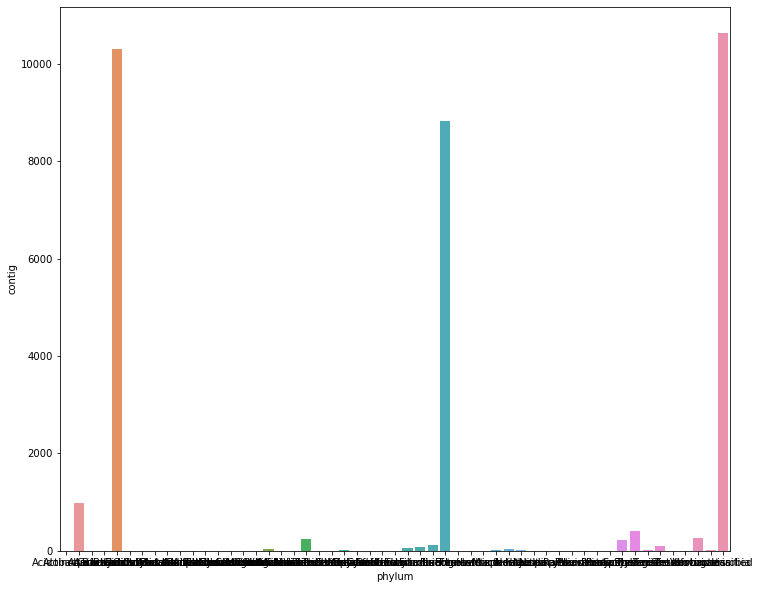

In [341]:
fig = plt.figure(figsize=(12, 10))
sns.barplot(data=tmp_df, x=tmp_df.index, y='contig')

Note that the x-tick labels are overlapped with each other. If it doesn't matter what should be placed on x- and y-axes, we can simply set `orient='h'` to adjust the orientation of the bar.

Also, remember to switch the data that used for x- and y-axes.

In addition to changing the bar orientation, we can also change the x label with a more accurate term "Contig counts"

Text(0.5, 0, 'Contig counts')

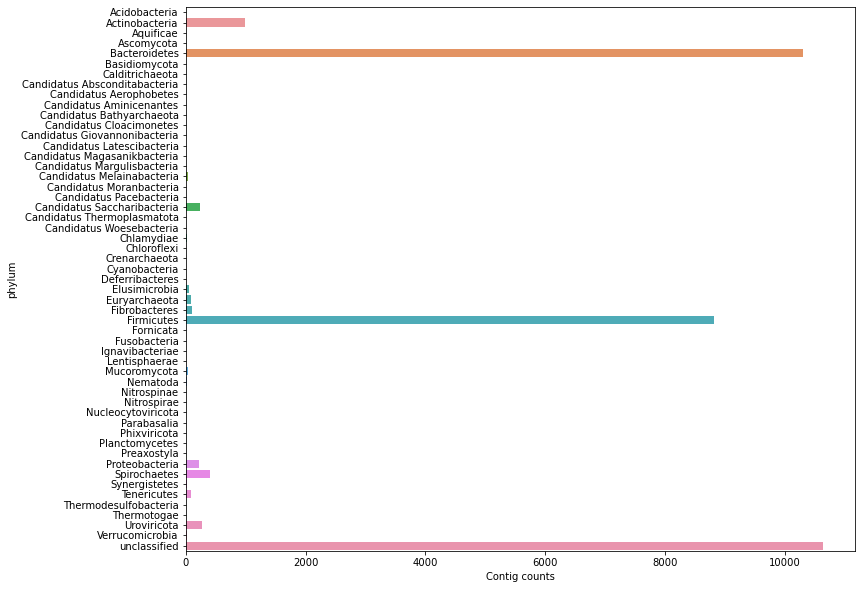

In [342]:
fig = plt.figure(figsize=(12, 10))
sns.barplot(data=tmp_df, x='contig', y=tmp_df.index, orient='h')
plt.xlabel('Contig counts')

### 4-2. Boxplot

In the next example, we're going to use `combined_df`, the expression profile **DataFrame** we built previously to practice how to draw a __[boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot)__.

First, let's revisit what the **DataFrame** look like.

In [343]:
combined_df

,Gene,sample1,sample2,sample3,sample4
0,PMP2,13.4498,13.3368,13.2347,13.1138
1,ARK1,9.31458,9.13275,8.98824,8.80636
2,SNC1,11.3689,11.221133,11.1856,11.1089
3,SWI1,9.43545,9.20186,8.88728,8.70331
4,YDR261W-B,12.8753,12.7187,12.5064,12.3575
5,YLR154W-F,11.5348,11.2489,10.6303,11.138
6,NHP6B,12.2365,12.1082,11.8639,12.069533
7,RAD28,8.87234,8.6147,8.05457,7.66417
8,RTC1,7.84207,7.213197,7.077,6.72052
9,KRE1,11.9253,11.8734,11.7278,11.626


OK, there is 1 column ('Gene') represents the gene names and 4 columns represent the expression of that gene in each samples.

The `seaborn.boxplot()` take an unpivot table, so we must do some transformation on our `combined_df`.

<img src="https://support.content.office.net/en-us/media/5740f568-5078-4454-aebd-e84abe75175e.png" alt="" title="Performing a unpivot transform" />

Luckily, the `pandas` also offers a one-liner can do it in second - `df.melt()`

In [344]:
unpivot_df = combined_df.melt(id_vars='Gene', value_vars=['sample1', 'sample2', 'sample3', 'sample4'])

In [345]:
unpivot_df

,Gene,variable,value
0,PMP2,sample1,13.4498
1,ARK1,sample1,9.31458
2,SNC1,sample1,11.3689
3,SWI1,sample1,9.43545
4,YDR261W-B,sample1,12.8753
...,...,...,...
91,EGT2,sample4,11.8038
92,YBL005W-A,sample4,11.9672
93,COX8,sample4,9.83718
94,PUP2,sample4,12.5135


OK, now we have successfully make it unpivot. We can finally throw it into the `seaborn.boxplot()` function and generate a nice boxplot.

Again, the function take 3 basic arguments - data, x and y.
- data: DataFrame, array, or list of arrays
- x: names of variables in `data` or vector data to place on x-axis
- y: names of variables in `data` or vector data to place on y-axis

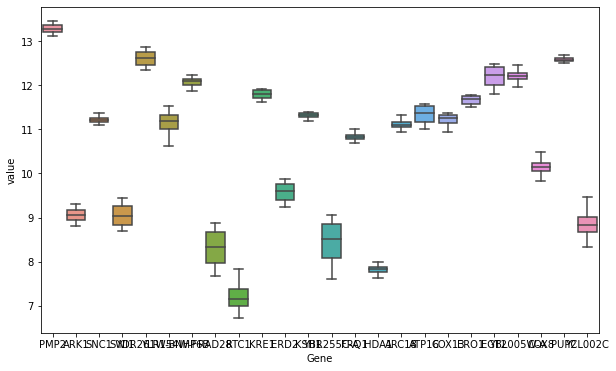

In [346]:
fig = plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=unpivot_df, x='Gene', y='value')

There are 2 problems in the figure.

- First, it might be better to sort the gene by its average expression.

- Second, the y label should be 'TPM' instead of 'value'.

- Third, the x-tick labels again overlapped with each other, and this time we don't want to switch the axes.

For the first issue, a solution is go back to the pivot DataFrame and get the mean of each row. We then sort the DataFrame by the row means, and then perform `df.melt()` to get a sorted unpivot table.

During performing the `df.melt()`, we can specify `value_name='TPM'` to correct the column name of the unpivot table, which might fix the second issue.

In [347]:
combined_df['avg'] = combined_df.iloc[:, 1:].mean(axis=1)

In [348]:
combined_df = combined_df.sort_values('avg')

In [349]:
unpivot_df = combined_df.melt(id_vars='Gene', value_vars=['sample1', 'sample2', 'sample3', 'sample4'], value_name='TPM')

In [350]:
unpivot_df

,Gene,variable,TPM
0,RTC1,sample1,7.84207
1,HDA1,sample1,7.98176
2,RAD28,sample1,8.87234
3,YBR255C-A,sample1,9.06145
4,YCL002C,sample1,8.86023
...,...,...,...
91,EGT2,sample4,11.8038
92,YBL005W-A,sample4,11.9672
93,PUP2,sample4,12.5135
94,YDR261W-B,sample4,12.3575


OK, the unpivot table is sorted by the average expression level of each gene.

Now, we can do the `seaborn.boxplot()` again and use the `set_xticklabels` function to rotate the x-tick labels.

[Text(0, 0, 'RTC1'),
 Text(1, 0, 'HDA1'),
 Text(2, 0, 'RAD28'),
 Text(3, 0, 'YBR255C-A'),
 Text(4, 0, 'YCL002C'),
 Text(5, 0, 'SWI1'),
 Text(6, 0, 'ARK1'),
 Text(7, 0, 'ERD2'),
 Text(8, 0, 'COX8'),
 Text(9, 0, 'FRQ1'),
 Text(10, 0, 'ARC18'),
 Text(11, 0, 'YLR154W-F'),
 Text(12, 0, 'COX13'),
 Text(13, 0, 'SNC1'),
 Text(14, 0, 'KSH1'),
 Text(15, 0, 'ATP16'),
 Text(16, 0, 'ERO1'),
 Text(17, 0, 'KRE1'),
 Text(18, 0, 'NHP6B'),
 Text(19, 0, 'EGT2'),
 Text(20, 0, 'YBL005W-A'),
 Text(21, 0, 'PUP2'),
 Text(22, 0, 'YDR261W-B'),
 Text(23, 0, 'PMP2')]

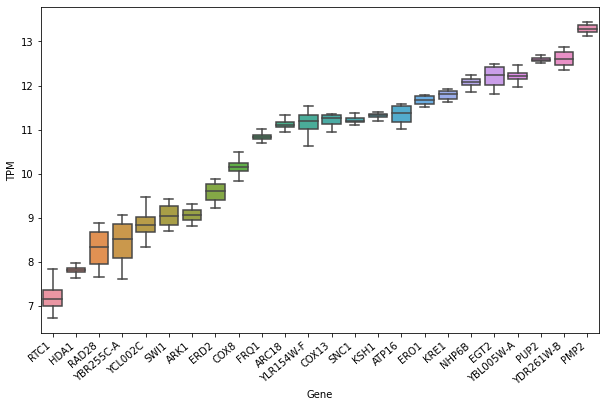

In [351]:
fig = plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=unpivot_df, x='Gene', y='TPM')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha = "right")

### 4-3. Heatmap

The last part, we're going to use the same expression profile (`combined_df`) to demonstrate how to generate a __[heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap)__.

Because the heatmap requires a homogeneous matrix (contains only one type of elements), so we have to transform our heterogeneous DataFrame into homogeneous one.

Let's take a look at the `combined_df`:

In [352]:
combined_df

,Gene,sample1,sample2,sample3,sample4,avg
8,RTC1,7.84207,7.213197,7.077,6.72052,7.213197
14,HDA1,7.98176,7.82998,7.62966,7.8138,7.813800
7,RAD28,8.87234,8.6147,8.05457,7.66417,8.301445
12,YBR255C-A,9.06145,8.79874,8.23745,7.60011,8.424438
38,YCL002C,8.86023,9.46633,8.78671,8.32765,8.860230
3,SWI1,9.43545,9.20186,8.88728,8.70331,9.056975
1,ARK1,9.31458,9.13275,8.98824,8.80636,9.060482
10,ERD2,9.86781,9.73894,9.46022,9.22987,9.574210
36,COX8,10.155227,10.488,10.1405,9.83718,10.155227
13,FRQ1,11.0098,10.837567,10.8126,10.6903,10.837567


As you can see, we only want columns from sample1 to sample4, and we also want to preserve the 'Gene' as the y-tick labels.

First, we switch the index column by the column 'Gene', and then drop the useless columns. ('Gene', 'avg')

In [353]:
combined_df.index = combined_df['Gene']

In [354]:
combined_df.drop(['Gene', 'avg'], axis=1, inplace=True)

In [355]:
combined_df

,sample1,sample2,sample3,sample4
Gene,,,,
RTC1,7.84207,7.213197,7.077,6.72052
HDA1,7.98176,7.82998,7.62966,7.8138
RAD28,8.87234,8.6147,8.05457,7.66417
YBR255C-A,9.06145,8.79874,8.23745,7.60011
YCL002C,8.86023,9.46633,8.78671,8.32765
SWI1,9.43545,9.20186,8.88728,8.70331
ARK1,9.31458,9.13275,8.98824,8.80636
ERD2,9.86781,9.73894,9.46022,9.22987
COX8,10.155227,10.488,10.1405,9.83718


OK, let's try to feed this homogeneous matrix into the `seaborn.heatmap()` function:

TypeError: Image data of dtype object cannot be converted to float

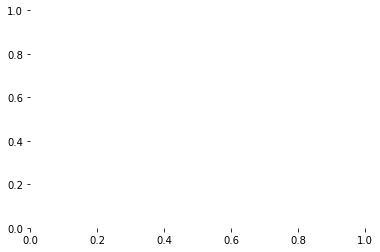

In [356]:
sns.heatmap(data=combined_df)

As error occurred!

According to the error message, we know that the DataFrame type is not *integer* or *float* but is *object*. (As shown below)

So we have to go through another step to convert the `dtype` into *float*. We can use `df.astype(float)` to achieve this.

In [357]:
combined_df.dtypes

sample1    object
sample2    object
sample3    object
sample4    object
dtype: object

In [358]:
combined_df = combined_df.astype(float)

In [359]:
combined_df.dtypes

sample1    float64
sample2    float64
sample3    float64
sample4    float64
dtype: object

Now, let's feed the matrix again to `seaborn.heatmap()`:

<AxesSubplot:ylabel='Gene'>

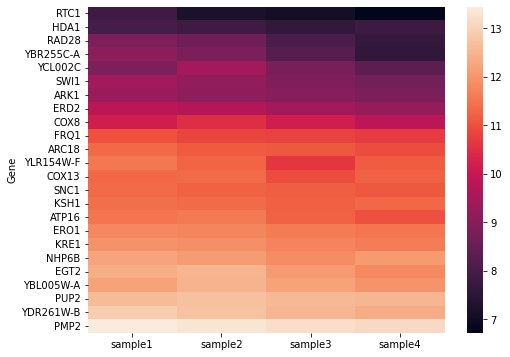

In [360]:
fig = plt.figure(figsize=(8, 6))
sns.heatmap(combined_df)

Great, we successfully generate a heatmap!

We can further improve our heatmap. Here are few things we can do to refine the plot:

- Z-transform: For many differentially expressed assay, they usually apply z-transform on each gene to have a higher contrast between groups.
- Color map: if we're going to z-transform the data, better represent the data with a __[diverging palette](https://seaborn.pydata.org/tutorial/color_palettes.html#diverging-color-palettes)__.

Below is a self defined function for z-transform, which is
    
$(X - mean)$ / $std$

In [361]:
def z_transform(vector):
    avg = vector.mean()
    std = vector.std()
    if not std:
        return 0
    return (vector - avg) / std

Using the `df.apply()` to apply the function row-wise.

In [362]:
z_combined_df = combined_df.apply(z_transform, axis=1)

In [363]:
z_combined_df

,sample1,sample2,sample3,sample4
Gene,,,,
RTC1,1.344064,-1.898266e-15,-0.291087,-1.052977
HDA1,1.164781,1.122062e-01,-1.276987,0.000000
RAD28,1.047489,5.747664e-01,-0.452971,-1.169285
YBR255C-A,0.982788,5.774771e-01,-0.288486,-1.271780
YCL002C,0.000000,1.295744e+00,-0.157174,-1.138570
SWI1,1.162275,4.449336e-01,-0.521124,-1.086085
ARK1,1.177989,3.350300e-01,-0.334914,-1.178105
ERD2,1.027594,5.765518e-01,-0.398963,-1.205183
COX8,0.000000,1.251497e+00,-0.055384,-1.196113


OK, lets feed the `z_combined_df` again to the `seaborn.heatmap` and use a different color palette by specifying the argument `cmap`.

<AxesSubplot:ylabel='Gene'>

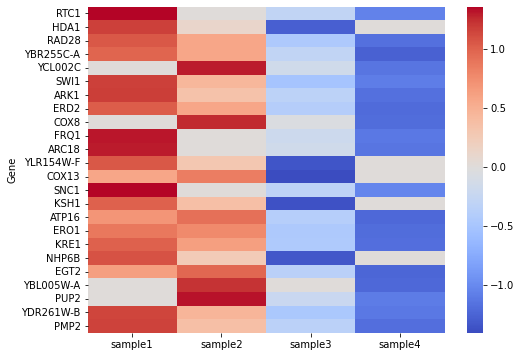

In [365]:
fig = plt.figure(figsize=(8, 6))
sns.heatmap(z_combined_df, cmap='coolwarm')

## Cleanup

In [366]:
%rm new_file.csv

In [367]:
%rm new_file2.csv

In [368]:
%rm new_file.tsv